# **Assignment 4 : Node embedding with Node2Vec**

### Setup

First of all, we install the [node2vec library](https://github.com/eliorc/node2vec) which offers a fast implementation of the node2vec method.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/) which explains some of the design choices behind this library.

In [1]:
!pip install node2vec

Defaulting to user installation because normal site-packages is not writeable


We now import the library, and create a small wrapper class which will expose only the few hyperparameters we will need to tune in this Colab

In [2]:
# from nodevectors.embedders import Node2Vec
import networkx as nx
from node2vec import Node2Vec


class Node2Vec(Node2Vec):
    """
    Parameters
    ----------
    p : float
        p parameter of node2vec
    q : float
        q parameter of node2vec
    d : int
        dimensionality of the embedding vectors
    """

    def __init__(self, graph, p=1, q=1, d=32):
        super().__init__(graph=graph, walk_length=10, p=p, q=q, dimensions=d)

Lastly, let's import some of the common libraries needed for our task.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

%matplotlib inline

### Example

In the example below, we will use Zachary's Karate Club network to demonstrate the node embedding of node2vec. First we get 8 dimensional embeddings of the nodes, then we apply [TSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-distributed stochastic neighbor embedding) for compressing the embedding matrix in 2 dimensions.

In [4]:
# Loading the Karate club graph from Networkx
KG = nx.karate_club_graph()

# Fit embedding model to the Karate Club graph
n2v_model = Node2Vec(KG, 1, 1, 8)

# Embed nodes
model = n2v_model.fit(window=10, min_count=1, batch_words=4)

# Node to vec representation
K8 = model.wv.vectors
K8.shape

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████| 10/10 [00:00<00:00, 444.89it/s]


(34, 8)

In [5]:
# Dimensionality reduction by TSNE
from sklearn.manifold import TSNE

K8_reduced = TSNE(n_components=2).fit_transform(K8)
K8_reduced.shape

/home/fox/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/fox/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(34, 2)

In [6]:
# Construct a pandas dataframe with the 2D embeddings from node2vec,
# plus the club name that each node belongs to after the split
embeddings = []
for id in range(len(KG.nodes)):
    embedding = K8_reduced[id]
    club = KG.nodes[id]["club"]
    embeddings.append([embedding[0], embedding[1], club])
df = pd.DataFrame(embeddings, columns=["x", "y", "club"])
df

,x,y,club
0,53.364445,206.793579,Mr. Hi
1,192.686874,115.429924,Mr. Hi
2,139.143372,182.102554,Mr. Hi
3,84.581551,127.523224,Mr. Hi
4,64.597046,-56.859737,Mr. Hi
5,-114.249008,-28.660099,Mr. Hi
6,-32.702000,-10.609940,Mr. Hi
7,22.928684,-22.352692,Mr. Hi
8,61.968559,61.578766,Mr. Hi
9,-124.779671,-161.978271,Officer


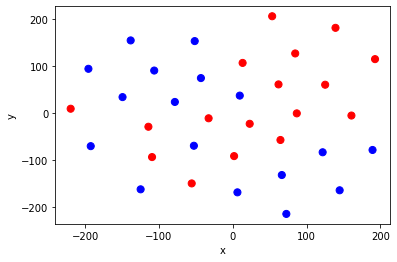

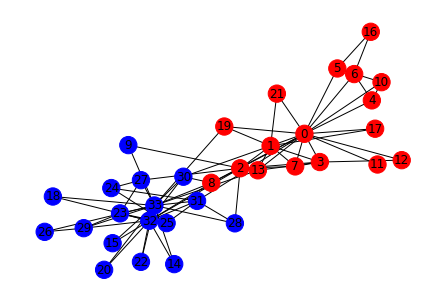

In [7]:
# Scatterplot and graph visualization
# Nodes who stayed with the Mr. Hi will be plotted in red, while nodes
# who moved with the Officer will be plotted in blue
colors = ["red" if x == "Mr. Hi" else "blue" for x in df.club]
df.plot.scatter(x="x", y="y", s=50, c=colors)
plt.show()

nx.draw(KG, with_labels=True, node_color=colors)
plt.show()

### Your Tasks

**Question 1 (20 pts):** Directly embed the nodes in 2D through node2vec (without TSNE), and visualize the similar scatterplot with two groups of points with different colors. You can reuse the code of previous cells for dataframe generation and scatterplot drawing. Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

In [ ]:
# INSERT CODE HERE. FEW LINES OF CODE.

Now we will study the behavior of node2vec on [barbell graphs](https://en.wikipedia.org/wiki/Barbell_graph).

Below you can see a toy example of a barbell graph generated with NetworkX ( [nx.barbell_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph) ). This is a barbell graph of two complete graphs (each having 7 nodes), connected by a chain of 2 nodes.

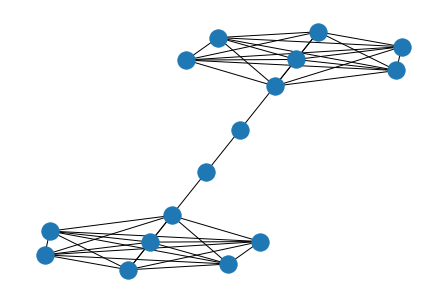

In [8]:
toy_barbell = nx.barbell_graph(7, 2)
nx.draw_kamada_kawai(toy_barbell)

**Question 2 (20 pts):**  Generate a barbell graph, where each complete graph has exactly 100 nodes, and there are 10 nodes in the path between them (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path have 10 internal nodes).

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

In [ ]:
# INSERT CODE HERE. FEW LINES OF CODE.

**Question 3 (30 pts):**
Now write a function *all_cos_sim(node_id, embedding_matrix)* that takes as input a node id ```x``` in the graph (e.g., ```5```) and the embedding matrix, and returns a list containing the cosine similarity between the node2vec vectors obtained from `model_2.wv.vectors` of the input node ```x``` and each of the nodes in the given barbell graph (including the similarity with ```x``` itself).

In [ ]:
# INSERT CODE HERE. FEW LINES OF CODE.

**Question 4 (30 pts):**
Group the simlarity frequecies in three bins, and visualize a barchart. You can see one example of creating barchart [here](https://pythonspot.com/matplotlib-bar-chart/) . The x axis ticks of your barchart will have three node groups (Other group, bridge nodes, and same group). The y axis will represent the count of nodes in each bin. Your barchart might look like the following barchart.

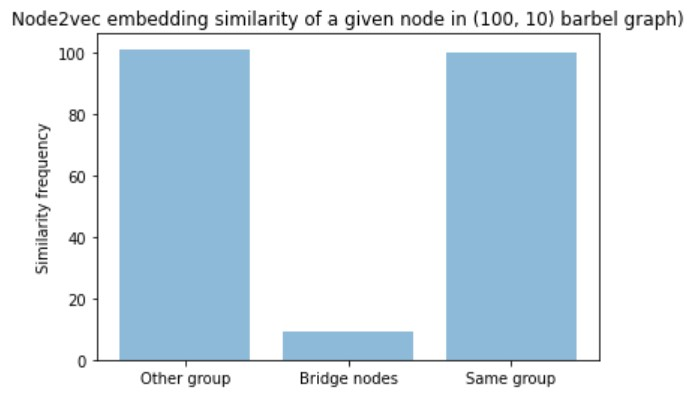

In [ ]:
sims = all_cos_sim(5, w2v_2)
# INSERT CODE HERE. FEW LINES OF CODE.